In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import joblib

# Detect Ransomware, Phishing, and Trojan.

In [2]:
# Load the dataset
df2 = pd.read_csv("./datasets/phishing_set.csv")
df2

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730



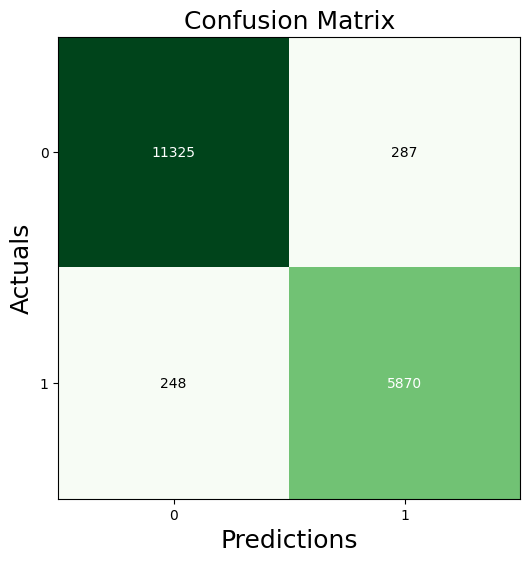

In [3]:
# Assuming your dataset contains features and a target variable
x2 = df2.drop(['phishing'], axis=1)  # Features
y2 = df2['phishing']  # Target variable

# Split the dataset into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(x2_train, y2_train)

# Save the trained model to a file
joblib.dump(model, './trained_model/xgBoost_model.pkl')

# Make predictions
y2_pred = model.predict(x2_test)

# Print classification report
print(classification_report(y2_test, y2_pred))

cm2=confusion_matrix(y2_test, y2_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm2 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Number of legitimate website instances (labeled as 0): 58,000
# Number of phishing website instances (labeled as 1): 30,647

#LOADED XG BOOST TRAIN MODEL

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730

Confusion Matrix:
[[11325   287]
 [  248  5870]]


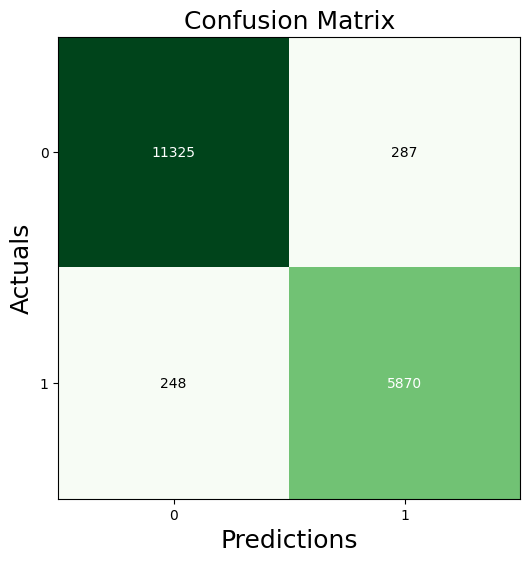

In [4]:
# Assuming your dataset contains features and a target variable
x2 = df2.drop(['phishing'], axis=1)  # Features
y2 = df2['phishing']  # Target variable

# Split the dataset into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Load the trained XGBoost model from the .pkl file
loaded_xgb_model = joblib.load('./trained_model/xgBoost_model.pkl')

# Make predictions using the loaded model
y2_pred = loaded_xgb_model.predict(x2_test)

# Print classification report
print(classification_report(y2_test, y2_pred))

# Print confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(cm2)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Number of legitimate website instances (labeled as 0): 58,000
# Number of phishing website instances (labeled as 1): 30,647